# TensolFlow

## base

### constant

In [3]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0
!pip install tensorflow==1.14
!pip install keras==2.2.4

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 377.1 MB 9.8 kB/s 
     |████████████████████████████████| 488 kB 41.5 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.1 MB 33.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0


     |████████████████████████████████| 109.3 MB 61 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


     |████████████████████████████████| 312 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [1]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'1.14.0'

In [2]:
import tensorflow as tf
import numpy as np

tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.compat.v1.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [3]:
import tensorflow as tf
import numpy as np

tf.compat.v1.disable_eager_execution() # need to disable eager in TF2.x

# プレースホルダーを定義
x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.compat.v1.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.85754176 0.98303165 0.01771492]
 [0.67977337 0.4477178  0.84820569]]
x: [[0.85754174 0.98303163 0.01771492]]
x: [[0.6797734 0.4477178 0.8482057]]


### variables

In [4]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.compat.v1.assign(x, calc_op)

sess = tf.compat.v1.Session()

# 変数の初期化
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 4.248456
Generation: 20. 誤差 = 3.57487
Generation: 30. 誤差 = 3.1392646
Generation: 40. 誤差 = 2.8075006
Generation: 50. 誤差 = 2.5547094
Generation: 60. 誤差 = 2.362092
Generation: 70. 誤差 = 2.2153256
Generation: 80. 誤差 = 2.1034951
Generation: 90. 誤差 = 2.0182853
Generation: 100. 誤差 = 1.9533582
Generation: 110. 誤差 = 1.9038864
Generation: 120. 誤差 = 1.8661911
Generation: 130. 誤差 = 1.8374687
Generation: 140. 誤差 = 1.8155833
Generation: 150. 誤差 = 1.7989075
Generation: 160. 誤差 = 1.786201
Generation: 170. 誤差 = 1.7765194
Generation: 180. 誤差 = 1.7691423
Generation: 190. 誤差 = 1.7635213
Generation: 200. 誤差 = 1.7592381
[8.7117195]
[2.0697842]


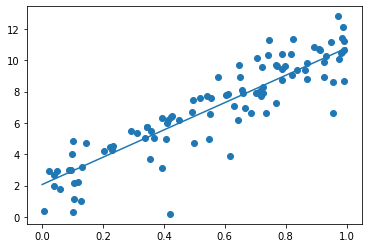

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 200
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 9 * x + 2

# ノイズを加える
noise = 1.5
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.compat.v1.placeholder(tf.float32, shape=[None,1])
dt = tf.compat.v1.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

# 考察
- ノイズが大きくなると係数と切片は真値から遠のくが、大きく外れることはない
- イタレーション回数を増やすことによる精度向上は限界がある

## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 39.20616
Generation: 200. 誤差 = 32.641163
Generation: 300. 誤差 = 26.985577
Generation: 400. 誤差 = 22.152676
Generation: 500. 誤差 = 18.05886
Generation: 600. 誤差 = 14.623785
Generation: 700. 誤差 = 11.770564
Generation: 800. 誤差 = 9.426055
Generation: 900. 誤差 = 7.5212927
Generation: 1000. 誤差 = 5.9918795
Generation: 1100. 誤差 = 4.778458
Generation: 1200. 誤差 = 3.8271475
Generation: 1300. 誤差 = 3.0898654
Generation: 1400. 誤差 = 2.524535
Generation: 1500. 誤差 = 2.095121
Generation: 1600. 誤差 = 1.77145
Generation: 1700. 誤差 = 1.528827
Generation: 1800. 誤差 = 1.3475171
Generation: 1900. 誤差 = 1.2120842
Generation: 2000. 誤差 = 1.1106834
Generation: 2100. 誤差 = 1.0343714
Generation: 2200. 誤差 = 0.9764731
Generation: 2300. 誤差 = 0.93203616
Generation: 2400. 誤差 = 0.8973904
Generation: 2500. 誤差 = 0.869814
Generation: 2600. 誤差 = 0.8472792
Generation: 2700. 誤差 = 0.828274
Generation: 2800. 誤差 = 0.8116738
Generation: 2900. 誤差 = 0.79664785
Generation: 3000. 誤差 = 0.7825919
Generation: 3100. 誤差 = 0.769

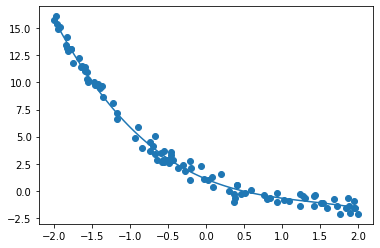

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.5
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.compat.v1.placeholder(tf.float32, [None, 4])
dt = tf.compat.v1.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.compat.v1.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.compat.v1.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

# 考察
- 次数が高くなると、収束するまでに必要なイタレーション回数が非常に多くなる

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 1000. 誤差 = 1018.5037
Generation: 2000. 誤差 = 328.97815
Generation: 3000. 誤差 = 139.81688
Generation: 4000. 誤差 = 70.67382
Generation: 5000. 誤差 = 26.82196
Generation: 6000. 誤差 = 6.098691
Generation: 7000. 誤差 = 0.81178945
Generation: 8000. 誤差 = 0.31487653
Generation: 9000. 誤差 = 0.30576634
Generation: 10000. 誤差 = 0.3057551
[[29.978498  ]
 [ 0.40512457]
 [ 0.19703776]]


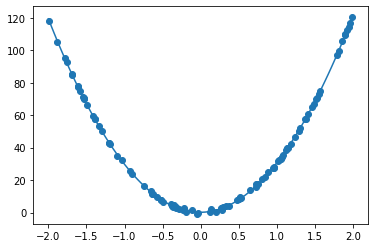

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 1000

input_layer_size = 3
output_layer_size = 1

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d = 30. * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
noise = 0.5
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.compat.v1.placeholder(tf.float32, [None, input_layer_size])
dt = tf.compat.v1.placeholder(tf.float32, [None, output_layer_size])
W = tf.Variable(tf.compat.v1.random_normal([input_layer_size, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.compat.v1.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

# 初期化
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape([n, output_layer_size])
x_train = np.zeros([n, input_layer_size])
for i in range(n):
    for j in range(input_layer_size):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])    

# 予測関数
def predict(x):
    result = 0.
    for i in range(0,input_layer_size):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[False False  True ... False False  True]
Generation: 1. 正解率 = 0.2035
[ True False  True ...  True False  True]
Generation: 2. 正解率 = 0.3719
[False False  True ...  True False False]
Generation: 3. 正解率 = 0.3352
[False False  True ...  True False False]
Generation: 4. 正解率 = 0.3746
[ True False  True ...  True False False]
Generation: 5. 正解率 = 0.4689
[ True False  True ...  True False False]
Generation: 6. 正解率 = 0.5416
[ True  True  True ... False False  True]
Generation: 7. 正解率 = 0.6187
[ True  True  True ... False False  True]
Generation: 8. 正解率 = 0.6428
[ True  True  True ... False False  True]
Generation: 9. 正解率 = 0.6296
[ True  True  True ... False False  True]
Generation: 10. 正解率 = 0.6752
[ True  True  True ...  True False  True]
Generation: 11. 正解率 = 0.6697
[ True False  True ...  True False

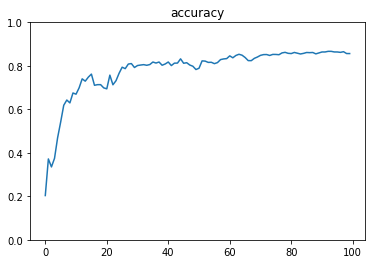

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# mnist = tf.keras.datasets.mnist

iters_num = 100
batch_size = 32
plot_interval = 1

x = tf.compat.v1.placeholder(tf.float32, [None, 784])
d = tf.compat.v1.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.compat.v1.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.compat.v1.reduce_sum(d * tf.compat.v1.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

# 考察
- バッチサイズを小さくすると、学習が安定しなくなる
- モデルの表現力の限界により最高の精度は低い

## 分類3層 (mnist)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  隠れ層のサイズを変更してみよう
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.101
Generation: 200. 正解率 = 0.2096
Generation: 300. 正解率 = 0.4358
Generation: 400. 正解率 = 0.5285
Generation: 500. 正解率 = 0.6398
Generation: 600. 正解率 = 0.6596
Generation: 700. 正解率 = 0.7206
Generation: 800. 正解率 = 0.7344
Generation: 900. 正解率 = 0.7807
Generation: 1000. 正解率 = 0.7871
Generation: 1100. 正解率 = 0.8098
Generation: 1200. 正解率 = 0.8324
Generation: 1300. 正解率 = 0.8374
Generation: 1400. 正解率 = 0.8494
Generation: 1500. 正解率 = 0.8577
Generation: 1600. 正解率 = 0.8647
Generation: 1700. 正解率 = 0.8689
Generation: 1800. 正解率 = 0.8736
Generation: 1900. 正解率 = 0.8754
Generation: 2000. 正解率 = 0.881
Generation: 2100. 正解率 = 0.884
Generation: 2200. 正解率 = 0.886
Generation: 2300. 正解率 = 0.8894
Generation: 2400. 正解率 = 0.8904
Generation: 2500. 正解率 = 0.8953
Generation: 2600. 正解率 = 0.8955
Generation: 2

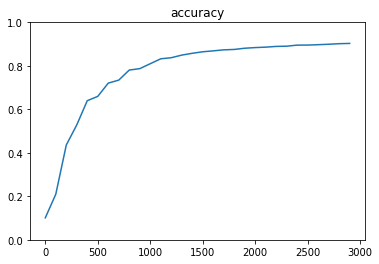

In [26]:
import tensorflow as tf
import numpy as np

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

# 考察
- OptimizerをAdamにすることで学習が安定する傾向が確認できた。
- 層を増やすことで、正解率も上がる傾向が見られたが、影響は比較的小さかった。

## 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.18
Generation: 20. 正解率 = 0.5
Generation: 30. 正解率 = 0.67
Generation: 40. 正解率 = 0.78
Generation: 50. 正解率 = 0.65
Generation: 60. 正解率 = 0.78
Generation: 70. 正解率 = 0.82
Generation: 80. 正解率 = 0.85
Generation: 90. 正解率 = 0.87
Generation: 100. 正解率 = 0.9
Generation: 110. 正解率 = 0.9
Generation: 120. 正解率 = 0.94
Generation: 130. 正解率 = 0.9
Generation: 140. 正解率 = 0.91
Generation: 150. 正解率 = 0.92
Generation: 160. 正解率 = 0.87
Generation: 170. 正解率 = 0.91
Generation: 180. 正解率 = 0.89
Generation: 190. 正解率 = 0.94
Generation: 200. 正解率 = 0.93
Ge

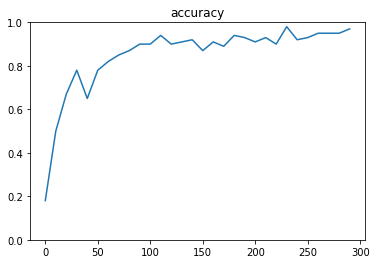

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# logging levelを変更
tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.0

# placeholder
x = tf.compat.v1.placeholder(tf.float32, shape=[None, 784])
d = tf.compat.v1.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                

# 考察
- ドロップアウトをゼロにすると、学習の安定性が下がる傾向が見られた。